Q2: -0.9640743126290274
r2_test: 0.6870969960694022
MAE_test: 0.9246583616573493
MSE_test: 1.6055077001624785
RMSE_test: 1.2670863033599875
r2_train: 0.9532790685598467
MAE_train: 0.1880072570570992
MSE_train: 0.27580494992319793
RMSE_train: 0.5251713529155965


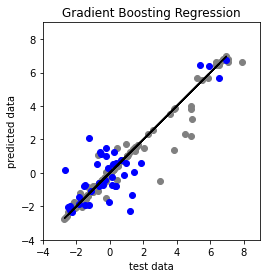

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

db = pd.read_csv('DiZyme.csv')

di2 = {'TMB':1.0, 'H2O2':2.0, 'ABTS': 3.0, 'OPD': 4.0, 'DAB':5.0, 'BA':6.0}
db['Subtype'].replace(di2, inplace=True)
x = db.loc[:,'Syngony':'volume'].values
y = db.loc[:,'Kcat'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

y_train =np.log10(y_train)
y_test = np.log10(y_test)
# Подгонка случайной лесной регрессии к набору данных
# импортировать регрессор
from sklearn.ensemble import GradientBoostingRegressor


# создать объект регрессора
regressor = GradientBoostingRegressor(learning_rate=0.5, n_estimators=178,min_samples_split=9,min_samples_leaf=6,loss='lad',max_depth=22,max_features='log2')


# установить регрессор с данными x и y
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
y1_pred = regressor.predict(x_train)


from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regressor, x_train, y_train, cv=20,
                        scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
plt.scatter(y_train, y1_pred, color='gray')
plt.scatter(y_test, y_pred, color = 'blue')
plt.plot(y_test, y_test, color = 'black')
plt.title('Gradient Boosting Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(-4, 9)
plt.ylim(-4, 9)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Q2: -0.6963328361357259
r2_test: 0.5854391603527895
MAE_test: 0.6464151619386492
MSE_test: 0.6821213804908208
RMSE_test: 0.8259063993521426
r2_train: 0.9305882618781162
MAE_train: 0.1348621954056722
MSE_train: 0.09539781527164572
RMSE_train: 0.30886536754975574


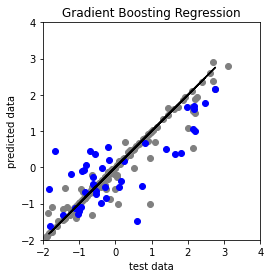

In [13]:
x = db.loc[:,'Syngony':'Ccat'].values
y = db.loc[:,'Km'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

y_train =np.log10(y_train)
y_test = np.log10(y_test)
# Подгонка случайной лесной регрессии к набору данных
# импортировать регрессор
from sklearn.ensemble import GradientBoostingRegressor


# создать объект регрессора
regressor = GradientBoostingRegressor(learning_rate=0.5, n_estimators=178,min_samples_split=9,min_samples_leaf=6,loss='lad',max_depth=22,max_features='log2')


# установить регрессор с данными x и y
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
y1_pred = regressor.predict(x_train)


from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regressor, x_train, y_train, cv=20,
                        scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
plt.scatter(y_train, y1_pred, color='gray')
plt.scatter(y_test, y_pred, color = 'blue')
plt.plot(y_test, y_test, color = 'black')
plt.title('Gradient Boosting Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()